In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings('ignore')
# TIMES SERIES LIBRARIES
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings('ignore')

In [86]:
#Reading the dataset
dataset = pd.read_excel('STEAK ORDERS.xlsx')

In [1]:
# displaying the first 10 rows in the DataFrame
dataset.head()

NameError: name 'dataset' is not defined

In [7]:
# displaying a tuple representing the dimensionality of our DataFrame e.g columns x rows.
dataset.shape

(724, 9)

# REMOVING UNNECESSARIES COLUMNS¶
* TEMP
* SAUCE
* ORDER_ID

In [88]:

# Create a new column called "quantity" with the count of each MENU_ITEM in each ORDER_ID
dataset['quantity'] = dataset.groupby(['ORDER_ID', 'MENU_ITEM'])['MENU_ITEM'].transform('count')

dataset = dataset.drop_duplicates()
# Print the result
print(dataset)

     ORDER_ID       DATE   TIME        MENU_ITEM MenuCategory TEMP MAIN_SIDES  \
0           1 2023-03-06  LUNCH    LUNCH SIRLOIN         MAIN   MR      CHIPS   
2           2 2023-03-06  LUNCH    LUNCH SIRLOIN         MAIN    M      CHIPS   
5           3 2023-03-06  LUNCH           RIBEYE         MAIN   MR      SALAD   
6           3 2023-03-06  LUNCH           FILLET         MAIN   MR      CHIPS   
7           4 2023-03-06  LUNCH  STEAK SANDUWICH         MAIN   MR      CHIPS   
..        ...        ...    ...              ...          ...  ...        ...   
719       141 2023-03-09  LUNCH           ONIONS   EXTRA_SIDE  NaN        NaN   
720       147 2023-03-09  LUNCH      ONION RINGS   EXTRA_SIDE  NaN        NaN   
721       150 2023-03-09  LUNCH    POTATO GRATIN   EXTRA_SIDE  NaN        NaN   
722       158 2023-03-09  LUNCH    POTATO GRATIN   EXTRA_SIDE  NaN        NaN   
723       158 2023-03-09  LUNCH            CHIPS   EXTRA_SIDE  NaN        NaN   

         SAUSE  MENU_PRICE 

In [89]:

# Group by ORDER_ID and count the number of MENU_ITEM in each group
menu_counts = dataset.groupby('ORDER_ID')['MENU_ITEM'].count()

# Group by ORDER_ID and sum the MENU_PRICE in each group
menu_prices = dataset.groupby('ORDER_ID')['MENU_PRICE'].sum()

# Combine the two Series into a single DataFrame
result = pd.concat([menu_counts, menu_prices], axis=1)

# Print the result
print(result)

          MENU_ITEM  MENU_PRICE
ORDER_ID                       
1                 2        29.0
2                 2        31.0
3                 4       123.0
4                 2        34.0
5                 1        18.0
...             ...         ...
154               3       115.0
155               1        16.0
156               1        18.0
157               1        24.0
158               4        76.0

[158 rows x 2 columns]


In [90]:
# displaying the first 10 rows in the DataFrame
result.head(10)

,MENU_ITEM,MENU_PRICE
ORDER_ID,,
1,2,29.0
2,2,31.0
3,4,123.0
4,2,34.0
5,1,18.0
6,3,56.0
7,1,39.0
8,1,15.0
9,2,34.0


In [91]:
pd.DataFrame([{'Items': len(dataset['MENU_ITEM'].value_counts()),    
               'Order': len(dataset['ORDER_ID'].value_counts()),
                 }], columns = ['Items', 'Order'], index = ['ORDER_ID'])

,Items,Order
ORDER_ID,44,158


In [13]:
# displaying the first 10 rows in the DataFrame
dataset.head(60)

,ORDER_ID,DATE,TIME,MENU_ITEM,MenuCategory,TEMP,MAIN_SIDES,SAUSE,MENU_PRICE,quantity
0,1,2023-03-06,LUNCH,LUNCH SIRLOIN,MAIN,MR,CHIPS,BEARNAISE,24.0,2
2,2,2023-03-06,LUNCH,LUNCH SIRLOIN,MAIN,M,CHIPS,BEARNAISE,24.0,3
5,3,2023-03-06,LUNCH,RIBEYE,MAIN,MR,SALAD,BEARNAISE,47.0,1
6,3,2023-03-06,LUNCH,FILLET,MAIN,MR,CHIPS,PEPPER,44.0,1
7,4,2023-03-06,LUNCH,STEAK SANDUWICH,MAIN,MR,CHIPS,NO SAUCE,16.0,1
8,4,2023-03-06,LUNCH,BURGER,MAIN,NON_P,CHIPS,NON_P,18.0,2
10,5,2023-03-06,LUNCH,BURGER,MAIN,NON_P,CHIPS,NON_P,18.0,1
11,6,2023-03-06,LUNCH,STEAK SANDUWICH,MAIN,MW,CHIPS,INCLUDED,16.0,3
12,6,2023-03-06,LUNCH,LUNCH SIRLOIN,MAIN,MW,CHIPS,BEARNAISE,24.0,1
13,6,2023-03-06,LUNCH,STEAK SANDUWICH,MAIN,MR,CHIPS,INCLUDED,16.0,3


In [14]:
#display the dataset columns updated without the ORDER_ID', 'SAUSE', 'TEMP columns
dataset.columns

Index(['ORDER_ID', 'DATE', 'TIME', 'MENU_ITEM', 'MenuCategory', 'TEMP',
       'MAIN_SIDES', 'SAUSE', 'MENU_PRICE', 'quantity'],
      dtype='object')

In [92]:
# showing the summary statistics of our numerical columns
dataset.describe()

,ORDER_ID,MENU_PRICE,quantity
count,646.000000,646.000000,646.000000
mean,77.746130,31.262384,1.708978
std,41.486084,23.599970,1.216991
min,1.000000,4.000000,1.000000
25%,42.000000,7.000000,1.000000
50%,74.500000,32.000000,1.000000
75%,114.000000,44.000000,2.000000
max,158.000000,98.000000,7.000000


In [93]:
# Checking for the data type of our collumns 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 0 to 723
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ORDER_ID      646 non-null    int64         
 1   DATE          646 non-null    datetime64[ns]
 2   TIME          646 non-null    object        
 3   MENU_ITEM     646 non-null    object        
 4   MenuCategory  646 non-null    object        
 5   TEMP          399 non-null    object        
 6   MAIN_SIDES    399 non-null    object        
 7   SAUSE         398 non-null    object        
 8   MENU_PRICE    646 non-null    float64       
 9   quantity      646 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 55.5+ KB


In [94]:
#checking for missing values

print(dataset.isnull().sum())

ORDER_ID          0
DATE              0
TIME              0
MENU_ITEM         0
MenuCategory      0
TEMP            247
MAIN_SIDES      247
SAUSE           248
MENU_PRICE        0
quantity          0
dtype: int64


In [95]:
# Fill the 'category' column with 'N/A' for rows where it is not applicable
dataset[['MAIN_SIDES','TEMP','SAUSE']] = dataset[['MAIN_SIDES','TEMP','SAUSE']].fillna('Not Applicable')

In [96]:
#checking for missing values after fill the missing values with N/A
print(dataset.isnull().sum())


ORDER_ID        0
DATE            0
TIME            0
MENU_ITEM       0
MenuCategory    0
TEMP            0
MAIN_SIDES      0
SAUSE           0
MENU_PRICE      0
quantity        0
dtype: int64


In [20]:
#Normalizing text -------------------------------------------->>>>>>>>>>>>>>>


In [21]:
#AQUI PODEMOS INSERIR UM RESUMO EXPLICANDO O QUE A GENTE JA FEZ ATE AQUI.

In [22]:
# Extract day of week and time from DATE column
#dataset['DATE'] = pd.to_datetime(dataset['DATE'])
#dataset['DAY_OF_WEEK'] = dataset['DATE'].dt.day_name()


In [97]:
# Converter a coluna 'date' para o tipo datetime
dataset['DATE'] = pd.to_datetime(dataset['DATE'])

# Criar a coluna 'day_of_week' com o dia da semana
dataset['DAY_OF_WEEK'] = dataset['DATE'].dt.day_name()

# Remover a coluna 'date'
dataset = dataset.drop('DATE', axis=1)



In [98]:
# Criar a coluna 'day_type' com base na coluna 'day_of_week'
dataset['DAY_TYPE'] = dataset['DAY_OF_WEEK'].apply(lambda x: 'WEEKDAY' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'WEEKEND')

# Imprimir o conjunto de dados resultante
print(dataset)

     ORDER_ID   TIME        MENU_ITEM MenuCategory            TEMP  \
0           1  LUNCH    LUNCH SIRLOIN         MAIN              MR   
2           2  LUNCH    LUNCH SIRLOIN         MAIN               M   
5           3  LUNCH           RIBEYE         MAIN              MR   
6           3  LUNCH           FILLET         MAIN              MR   
7           4  LUNCH  STEAK SANDUWICH         MAIN              MR   
..        ...    ...              ...          ...             ...   
719       141  LUNCH           ONIONS   EXTRA_SIDE  Not Applicable   
720       147  LUNCH      ONION RINGS   EXTRA_SIDE  Not Applicable   
721       150  LUNCH    POTATO GRATIN   EXTRA_SIDE  Not Applicable   
722       158  LUNCH    POTATO GRATIN   EXTRA_SIDE  Not Applicable   
723       158  LUNCH            CHIPS   EXTRA_SIDE  Not Applicable   

         MAIN_SIDES           SAUSE  MENU_PRICE  quantity DAY_OF_WEEK DAY_TYPE  
0             CHIPS       BEARNAISE        24.0         2      Monday  WEEKDAY

In [99]:
# Renomear as colunas
dataset = dataset.rename(columns={'MenuCategory': 'MENU_CATEGORY', 'day_of_week': 'DAY_OF_WEEK','weekday': 'WEEKDAY','weekend': 'WEEKEND'})

# Padronizar as linhas para UPPER CASE
dataset = dataset.apply(lambda x: x.str.upper() if x.dtype == "object" else x)


# Imprimir o conjunto de dados resultante
dataset.head(10)

,ORDER_ID,TIME,MENU_ITEM,MENU_CATEGORY,TEMP,MAIN_SIDES,SAUSE,MENU_PRICE,quantity,DAY_OF_WEEK,DAY_TYPE
0,1,LUNCH,LUNCH SIRLOIN,MAIN,MR,CHIPS,BEARNAISE,24.0,2,MONDAY,WEEKDAY
2,2,LUNCH,LUNCH SIRLOIN,MAIN,M,CHIPS,BEARNAISE,24.0,3,MONDAY,WEEKDAY
5,3,LUNCH,RIBEYE,MAIN,MR,SALAD,BEARNAISE,47.0,1,MONDAY,WEEKDAY
6,3,LUNCH,FILLET,MAIN,MR,CHIPS,PEPPER,44.0,1,MONDAY,WEEKDAY
7,4,LUNCH,STEAK SANDUWICH,MAIN,MR,CHIPS,NO SAUCE,16.0,1,MONDAY,WEEKDAY
8,4,LUNCH,BURGER,MAIN,NON_P,CHIPS,NON_P,18.0,2,MONDAY,WEEKDAY
10,5,LUNCH,BURGER,MAIN,NON_P,CHIPS,NON_P,18.0,1,MONDAY,WEEKDAY
11,6,LUNCH,STEAK SANDUWICH,MAIN,MW,CHIPS,INCLUDED,16.0,3,MONDAY,WEEKDAY
12,6,LUNCH,LUNCH SIRLOIN,MAIN,MW,CHIPS,BEARNAISE,24.0,1,MONDAY,WEEKDAY
13,6,LUNCH,STEAK SANDUWICH,MAIN,MR,CHIPS,INCLUDED,16.0,3,MONDAY,WEEKDAY


In [100]:
print(dataset.dtypes)

ORDER_ID           int64
TIME              object
MENU_ITEM         object
MENU_CATEGORY     object
TEMP              object
MAIN_SIDES        object
SAUSE             object
MENU_PRICE       float64
quantity           int64
DAY_OF_WEEK       object
DAY_TYPE          object
dtype: object


In [101]:
# Dividing data based on Weekday
weekday = dataset[dataset['DAY_TYPE']=='WEEKDAY']
print(weekday.shape)
weekday.head(100)

(456, 11)


,ORDER_ID,TIME,MENU_ITEM,MENU_CATEGORY,TEMP,MAIN_SIDES,SAUSE,MENU_PRICE,quantity,DAY_OF_WEEK,DAY_TYPE
0,1,LUNCH,LUNCH SIRLOIN,MAIN,MR,CHIPS,BEARNAISE,24.0,2,MONDAY,WEEKDAY
2,2,LUNCH,LUNCH SIRLOIN,MAIN,M,CHIPS,BEARNAISE,24.0,3,MONDAY,WEEKDAY
5,3,LUNCH,RIBEYE,MAIN,MR,SALAD,BEARNAISE,47.0,1,MONDAY,WEEKDAY
6,3,LUNCH,FILLET,MAIN,MR,CHIPS,PEPPER,44.0,1,MONDAY,WEEKDAY
7,4,LUNCH,STEAK SANDUWICH,MAIN,MR,CHIPS,NO SAUCE,16.0,1,MONDAY,WEEKDAY
...,...,...,...,...,...,...,...,...,...,...,...
101,39,DINNER,T-BONE,MAIN,MR,SALAD,RED WINE JUS,49.0,1,MONDAY,WEEKDAY
102,39,DINNER,RIBEYE,MAIN,M,SALAD,BEARNAISE,47.0,1,MONDAY,WEEKDAY
103,40,DINNER,RIBEYE ON BONE,MAIN,WD,POTATO GRATIN,GARLIC BUTTER,60.0,1,MONDAY,WEEKDAY
104,40,DINNER,RIBEYE,MAIN,M,CHIPS,PEPPER,47.0,1,MONDAY,WEEKDAY


In [102]:
# Dividing data based on Weekeend
weekend = dataset[dataset['DAY_TYPE']=='WEEKEND']
print(weekend.shape)
weekend.head()

(190, 11)


,ORDER_ID,TIME,MENU_ITEM,MENU_CATEGORY,TEMP,MAIN_SIDES,SAUSE,MENU_PRICE,quantity,DAY_OF_WEEK,DAY_TYPE
109,43,LUNCH,RIBEYE,MAIN,M,CHIPS,PEPPER,47.0,1,SATURDAY,WEEKEND
110,43,LUNCH,FILLET,MAIN,M,SALAD,BEARNAISE,44.0,1,SATURDAY,WEEKEND
111,44,LUNCH,FILLET,MAIN,MW,CHIPS,PEPPER,44.0,2,SATURDAY,WEEKEND
112,44,LUNCH,FILLET,MAIN,MW,MASH,PEPPER,44.0,2,SATURDAY,WEEKEND
113,45,LUNCH,FILLET,MAIN,MR,CHIPS,PEPPER,44.0,4,SATURDAY,WEEKEND


## GENERATING DATA FOR MORE WEEKS
- AS WE HAVE ONLY FEW WEEKS, WE DECIDE TO GENERATE MORE WEEKS BASED IN OUR DATASET

In [103]:
# Monday - WeekDay
monday = weekday.copy()

# Tuesday - WeekDay
tuesday = weekday.copy()
tuesday['DAY_OF_WEEK'] = tuesday['DAY_OF_WEEK'].str.replace('MONDAY','TUESDAY')

# Wednesday - WeekDay
wednesday = weekday.copy()                                         
wednesday['DAY_OF_WEEK'] = wednesday['DAY_OF_WEEK'].str.replace('THURSDAY','WEDNESDAY')
# Thusday - WeekDay
thursday = weekday.copy() 
# Friday - WeekEnd
friday = weekend.copy()                                          
friday['DAY_OF_WEEK'] = friday['DAY_OF_WEEK'].str.replace('SATURDAY','FRIDAY')

# Saturday - WeekEnd
saturday = weekend.copy()                                        

# Sunday - WeekDay
sunday = weekday.copy()                                          
sunday['DAY_OF_WEEK'] = sunday['DAY_OF_WEEK'].str.replace('THURSDAY','SUNDAY')

In [104]:
# Creating data for one week 
week = []
week = pd.concat([tuesday,wednesday,thursday,friday,saturday,sunday,monday,],axis = 0)
print(week.shape)
week.head()

(2660, 11)


,ORDER_ID,TIME,MENU_ITEM,MENU_CATEGORY,TEMP,MAIN_SIDES,SAUSE,MENU_PRICE,quantity,DAY_OF_WEEK,DAY_TYPE
0,1,LUNCH,LUNCH SIRLOIN,MAIN,MR,CHIPS,BEARNAISE,24.0,2,TUESDAY,WEEKDAY
2,2,LUNCH,LUNCH SIRLOIN,MAIN,M,CHIPS,BEARNAISE,24.0,3,TUESDAY,WEEKDAY
5,3,LUNCH,RIBEYE,MAIN,MR,SALAD,BEARNAISE,47.0,1,TUESDAY,WEEKDAY
6,3,LUNCH,FILLET,MAIN,MR,CHIPS,PEPPER,44.0,1,TUESDAY,WEEKDAY
7,4,LUNCH,STEAK SANDUWICH,MAIN,MR,CHIPS,NO SAUCE,16.0,1,TUESDAY,WEEKDAY


In [105]:
#CREATING DATA FOR 6 MONYHS WITH HELP OF ABOVE DATA

months = week.copy()
x = 0 
while x <25:
    months = pd.concat([months,week],axis= 0)
    x = x+1
months.reset_index(drop = True, inplace = True)
print(months.shape)
months.head(10)
    

(69160, 11)


,ORDER_ID,TIME,MENU_ITEM,MENU_CATEGORY,TEMP,MAIN_SIDES,SAUSE,MENU_PRICE,quantity,DAY_OF_WEEK,DAY_TYPE
0,1,LUNCH,LUNCH SIRLOIN,MAIN,MR,CHIPS,BEARNAISE,24.0,2,TUESDAY,WEEKDAY
1,2,LUNCH,LUNCH SIRLOIN,MAIN,M,CHIPS,BEARNAISE,24.0,3,TUESDAY,WEEKDAY
2,3,LUNCH,RIBEYE,MAIN,MR,SALAD,BEARNAISE,47.0,1,TUESDAY,WEEKDAY
3,3,LUNCH,FILLET,MAIN,MR,CHIPS,PEPPER,44.0,1,TUESDAY,WEEKDAY
4,4,LUNCH,STEAK SANDUWICH,MAIN,MR,CHIPS,NO SAUCE,16.0,1,TUESDAY,WEEKDAY
5,4,LUNCH,BURGER,MAIN,NON_P,CHIPS,NON_P,18.0,2,TUESDAY,WEEKDAY
6,5,LUNCH,BURGER,MAIN,NON_P,CHIPS,NON_P,18.0,1,TUESDAY,WEEKDAY
7,6,LUNCH,STEAK SANDUWICH,MAIN,MW,CHIPS,INCLUDED,16.0,3,TUESDAY,WEEKDAY
8,6,LUNCH,LUNCH SIRLOIN,MAIN,MW,CHIPS,BEARNAISE,24.0,1,TUESDAY,WEEKDAY
9,6,LUNCH,STEAK SANDUWICH,MAIN,MR,CHIPS,INCLUDED,16.0,3,TUESDAY,WEEKDAY


In [32]:
months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69160 entries, 0 to 69159
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ORDER_ID       69160 non-null  int64  
 1   TIME           69160 non-null  object 
 2   MENU_ITEM      69160 non-null  object 
 3   MENU_CATEGORY  69160 non-null  object 
 4   TEMP           69160 non-null  object 
 5   MAIN_SIDES     69160 non-null  object 
 6   SAUSE          69160 non-null  object 
 7   MENU_PRICE     69160 non-null  float64
 8   quantity       69160 non-null  int64  
 9   DAY_OF_WEEK    69160 non-null  object 
 10  DAY_TYPE       69160 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 5.8+ MB


In [154]:
# Creating dates for dataframe.
o = pd.date_range(start='03/3/2023', periods=(len(months)/6), freq='D')
date = []
for i in o:
    for j in range(100):
        date.append(i)
date = pd.DataFrame(date,columns = ['DATE'])
date.head()

,DATE
0,2023-03-03
1,2023-03-03
2,2023-03-03
3,2023-03-03
4,2023-03-03


In [155]:
# Concating Dates and Months Dataframe
final = pd.concat([date,months],axis = 1)
final.head()

,DATE,ORDER_ID,TIME,MENU_ITEM,MENU_CATEGORY,TEMP,MAIN_SIDES,SAUSE,MENU_PRICE,quantity,DAY_OF_WEEK,DAY_TYPE
0,2023-03-03,1.0,LUNCH,LUNCH SIRLOIN,MAIN,MR,CHIPS,BEARNAISE,24.0,2.0,TUESDAY,WEEKDAY
1,2023-03-03,2.0,LUNCH,LUNCH SIRLOIN,MAIN,M,CHIPS,BEARNAISE,24.0,3.0,TUESDAY,WEEKDAY
2,2023-03-03,3.0,LUNCH,RIBEYE,MAIN,MR,SALAD,BEARNAISE,47.0,1.0,TUESDAY,WEEKDAY
3,2023-03-03,3.0,LUNCH,FILLET,MAIN,MR,CHIPS,PEPPER,44.0,1.0,TUESDAY,WEEKDAY
4,2023-03-03,4.0,LUNCH,STEAK SANDUWICH,MAIN,MR,CHIPS,NO SAUCE,16.0,1.0,TUESDAY,WEEKDAY


In [156]:
# Changing Columns Postions for better understanding
final = final[['DATE', 'TIME', 'DAY_OF_WEEK', 'DAY_TYPE','MENU_CATEGORY', 'MENU_ITEM', 'MAIN_SIDES','quantity','MENU_PRICE']]
final = final.iloc[:18100,:]
final.head()

,DATE,TIME,DAY_OF_WEEK,DAY_TYPE,MENU_CATEGORY,MENU_ITEM,MAIN_SIDES,quantity,MENU_PRICE
0,2023-03-03,LUNCH,TUESDAY,WEEKDAY,MAIN,LUNCH SIRLOIN,CHIPS,2.0,24.0
1,2023-03-03,LUNCH,TUESDAY,WEEKDAY,MAIN,LUNCH SIRLOIN,CHIPS,3.0,24.0
2,2023-03-03,LUNCH,TUESDAY,WEEKDAY,MAIN,RIBEYE,SALAD,1.0,47.0
3,2023-03-03,LUNCH,TUESDAY,WEEKDAY,MAIN,FILLET,CHIPS,1.0,44.0
4,2023-03-03,LUNCH,TUESDAY,WEEKDAY,MAIN,STEAK SANDUWICH,CHIPS,1.0,16.0


In [157]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18100 entries, 0 to 18099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           18100 non-null  datetime64[ns]
 1   TIME           18100 non-null  object        
 2   DAY_OF_WEEK    18100 non-null  object        
 3   DAY_TYPE       18100 non-null  object        
 4   MENU_CATEGORY  18100 non-null  object        
 5   MENU_ITEM      18100 non-null  object        
 6   MAIN_SIDES     18100 non-null  object        
 7   quantity       18100 non-null  float64       
 8   MENU_PRICE     18100 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 1.4+ MB


In [158]:
final.to_csv('final_dataset_saved.csv', index=False)

In [37]:
#****************finish data preparation


In [160]:
dataset = final
dataset.head()

,DATE,TIME,DAY_OF_WEEK,DAY_TYPE,MENU_CATEGORY,MENU_ITEM,MAIN_SIDES,quantity,MENU_PRICE
0,2023-03-03,LUNCH,TUESDAY,WEEKDAY,MAIN,LUNCH SIRLOIN,CHIPS,2.0,24.0
1,2023-03-03,LUNCH,TUESDAY,WEEKDAY,MAIN,LUNCH SIRLOIN,CHIPS,3.0,24.0
2,2023-03-03,LUNCH,TUESDAY,WEEKDAY,MAIN,RIBEYE,SALAD,1.0,47.0
3,2023-03-03,LUNCH,TUESDAY,WEEKDAY,MAIN,FILLET,CHIPS,1.0,44.0
4,2023-03-03,LUNCH,TUESDAY,WEEKDAY,MAIN,STEAK SANDUWICH,CHIPS,1.0,16.0



## VISUALIZATION: PLOTTING GRAPH TO FIND ANY RELATIONSHIP BETWEEN VARIABLES

<AxesSubplot:>

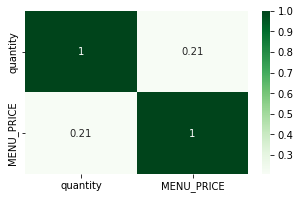

In [161]:
plt.figure(figsize=(5,3))
sns.heatmap(dataset.corr(),annot=True, cmap="Greens")

In [162]:
# Extracting Two Columns for visualization purpose.
product_1 = dataset[['MENU_ITEM','quantity']]

# Combining two rows 'MenuItem' and 'ItemQty' for Analysis and multiplying based on ItemQty
product = product_1.loc[product_1.index.repeat(product_1.quantity)].reset_index(drop=True)
product = product[['MENU_ITEM']]
product.head()

,MENU_ITEM
0,LUNCH SIRLOIN
1,LUNCH SIRLOIN
2,LUNCH SIRLOIN
3,LUNCH SIRLOIN
4,LUNCH SIRLOIN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'FILLET'),
  Text(1, 0, 'RIBEYE'),
  Text(2, 0, 'RIBEYE ON BONE'),
  Text(3, 0, 'SIRLOIN'),
  Text(4, 0, 'LUNCH SIRLOIN'),
  Text(5, 0, 'ONION RINGS'),
  Text(6, 0, 'STEAK SANDUWICH'),
  Text(7, 0, 'SPINACH'),
  Text(8, 0, 'MEDALLIONS'),
  Text(9, 0, 'BROCCOLI'),
  Text(10, 0, 'CHATEAUBRIAND'),
  Text(11, 0, 'SIRLOIN ON BONE'),
  Text(12, 0, 'BURGER'),
  Text(13, 0, 'SUPREME CHICKEN'),
  Text(14, 0, 'T-BONE'),
  Text(15, 0, 'PORTERHOUSE'),
  Text(16, 0, 'GREEN BEANS'),
  Text(17, 0, 'CAESAR SALAD'),
  Text(18, 0, 'RIB NUGGET'),
  Text(19, 0, 'SOUP'),
  Text(20, 0, 'CHIPS'),
  Text(21, 0, 'OYSTERS'),
  Text(22, 0, 'CARROTS'),
  Text(23, 0, 'SALAD'),
  Text(24, 0, 'ONIONS'),
  Text(25, 0, 'LAMBKIDNEY'),
  Text(26, 0, 'POTATO GRATIN'),
  Text(27, 0, 'TRUFFLE EGG'),
  Text(28, 0

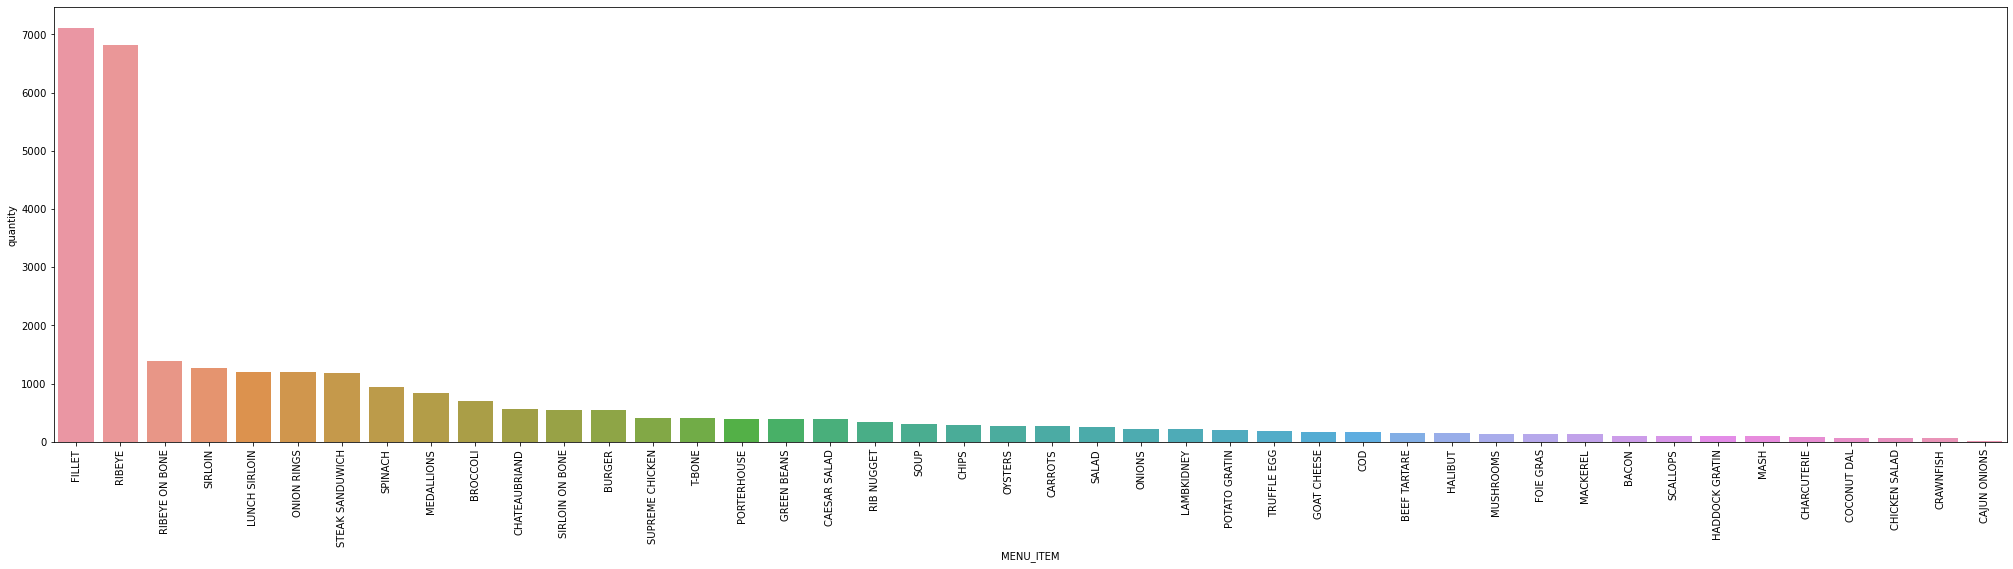

In [163]:
p = pd.DataFrame(product_1.groupby(['MENU_ITEM']).sum())
p = p.reset_index()
p.sort_values(by=['quantity'], inplace=True,ascending=False)
plt.figure(figsize=(35,8))
chart = sns.barplot(x="MENU_ITEM", y="quantity", data=p)
plt.xticks(rotation=90)

In [113]:
dataset['MENU_ITEM'].unique()

array(['LUNCH SIRLOIN', 'RIBEYE', 'FILLET', 'STEAK SANDUWICH', 'BURGER',
       'SIRLOIN ON BONE', 'CHICKEN SALAD', 'RIBEYE ON BONE', 'SIRLOIN',
       'HALIBUT', 'GOAT CHEESE', 'CAESAR SALAD', 'RIB NUGGET',
       'PORTERHOUSE', 'MEDALLIONS', 'SUPREME CHICKEN', 'OYSTERS',
       'T-BONE', 'CHATEAUBRIAND', 'BEEF TARTARE', 'COD', 'SOUP',
       'MACKEREL', 'COCONUT DAL', 'HADDOCK GRATIN', 'CHARCUTERIE',
       'SCALLOPS', 'CRAWNFISH', 'LAMBKIDNEY', 'ONIONS', 'ONION RINGS',
       'SALAD', 'BROCCOLI', 'MUSHROOMS', 'CARROTS', 'GREEN BEANS',
       'POTATO GRATIN', 'SPINACH', 'CHIPS', 'TRUFFLE EGG', 'MASH',
       'BACON', 'FOIE GRAS', 'CAJUN ONIONS'], dtype=object)

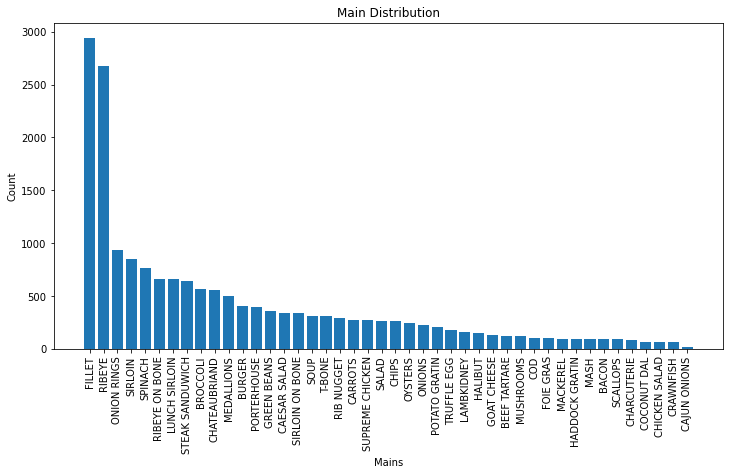

In [164]:
main_counts = dataset['MENU_ITEM'].value_counts()

# create a bar chart using the counts data
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(main_counts.index, main_counts.values)

# set the title and labels for the chart
ax.set_title('Main Distribution')
ax.set_xlabel('Mains')
ax.set_ylabel('Count')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# display the chart
plt.show()


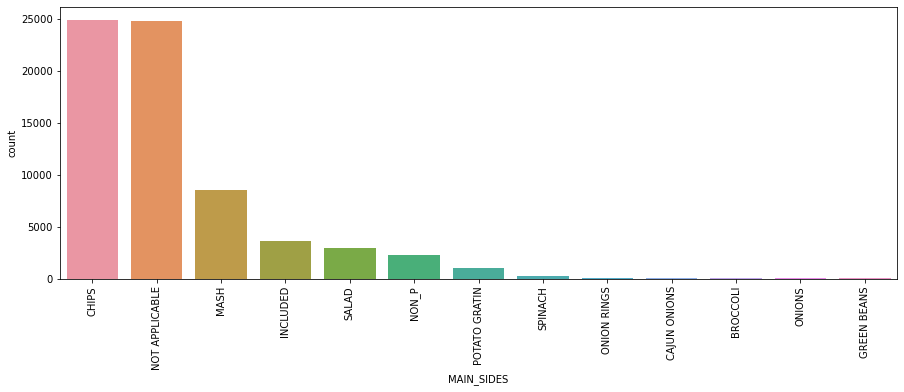

In [115]:
#plt.figure(figsize=(15,5))
#graph = sns.countplot('MAIN_SIDES', data = dataset)
#graph.tick_params(axis='x', rotation=90)
# Contar o número de ocorrências de cada valor único na coluna 'MAIN_SIDES'
counts = dataset['MAIN_SIDES'].value_counts()

# Ordenar os valores únicos em ordem decrescente pela contagem correspondente
order = counts.index.tolist()

# Criar o gráfico de barras com as barras ordenadas em ordem decrescente
plt.figure(figsize=(15,5))
graph = sns.countplot('MAIN_SIDES', data = dataset, order=order)
graph.tick_params(axis='x', rotation=90)

In [165]:
table_types_sides = dataset['MAIN_SIDES'].value_counts()
column_group = [] #list empty to group the irrelevants products 
for type in table_types_sides.index:
    if table_types_sides[type] <=400:
        column_group.append(type)
print(column_group)

for type in column_group:
    dataset.loc[dataset['MAIN_SIDES']==type,'MAIN_SIDES']= "OTHER"

['POTATO GRATIN', 'SPINACH', 'ONION RINGS', 'CAJUN ONIONS', 'BROCCOLI', 'ONIONS', 'GREEN BEANS']


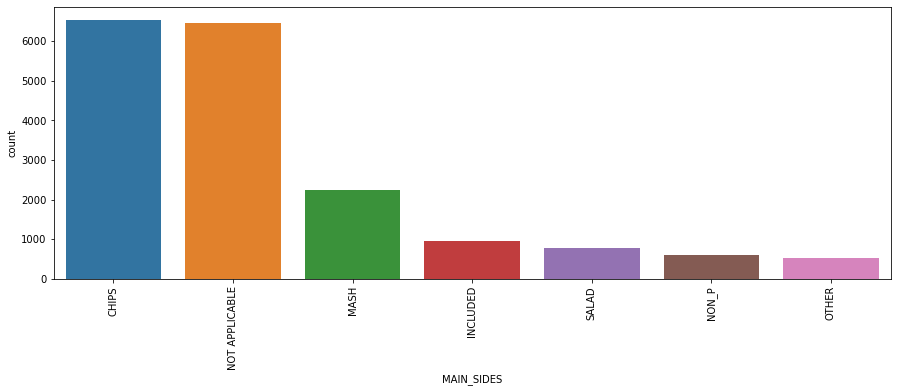

In [166]:
counts = dataset['MAIN_SIDES'].value_counts()

# Ordenar os valores únicos em ordem decrescente pela contagem correspondente
order = counts.index.tolist()

# Criar o gráfico de barras com as barras ordenadas em ordem decrescente
plt.figure(figsize=(15,5))
graph = sns.countplot('MAIN_SIDES', data = dataset, order=order)
graph.tick_params(axis='x', rotation=90)

In [99]:
# Drop ORDER_ID, TEMP AND DATE columns
#dataset = dataset.drop(['ORDER_ID', 'DATE','TEMP'], axis=1)

In [167]:
dataset['MENU_ITEM'] = pd.Categorical(dataset['MENU_ITEM'])

In [168]:
# rename the 'TIME' column to 'time_of_day'
dataset = dataset.rename(columns={'TIME': 'TIME_OF_DAY'})
dataset = dataset.rename(columns={'quantity': 'QUANTITY'})

# print the updated column names
print(dataset.columns)

Index(['DATE', 'TIME_OF_DAY', 'DAY_OF_WEEK', 'DAY_TYPE', 'MENU_CATEGORY',
       'MENU_ITEM', 'MAIN_SIDES', 'QUANTITY', 'MENU_PRICE'],
      dtype='object')


In [120]:
dataset.head(10)

,DATE,ORDER_ID,TIME_OF_DAY,MENU_ITEM,MENU_CATEGORY,TEMP,MAIN_SIDES,SAUSE,MENU_PRICE,QUANTITY,DAY_OF_WEEK,DAY_TYPE
0,2023-10-03,1,LUNCH,LUNCH SIRLOIN,MAIN,MR,CHIPS,BEARNAISE,24.0,2,TUESDAY,WEEKDAY
1,2023-10-03,2,LUNCH,LUNCH SIRLOIN,MAIN,M,CHIPS,BEARNAISE,24.0,3,TUESDAY,WEEKDAY
2,2023-10-03,3,LUNCH,RIBEYE,MAIN,MR,SALAD,BEARNAISE,47.0,1,TUESDAY,WEEKDAY
3,2023-10-03,3,LUNCH,FILLET,MAIN,MR,CHIPS,PEPPER,44.0,1,TUESDAY,WEEKDAY
4,2023-10-03,4,LUNCH,STEAK SANDUWICH,MAIN,MR,CHIPS,NO SAUCE,16.0,1,TUESDAY,WEEKDAY
5,2023-10-03,4,LUNCH,BURGER,MAIN,NON_P,CHIPS,NON_P,18.0,2,TUESDAY,WEEKDAY
6,2023-10-03,5,LUNCH,BURGER,MAIN,NON_P,CHIPS,NON_P,18.0,1,TUESDAY,WEEKDAY
7,2023-10-03,6,LUNCH,STEAK SANDUWICH,MAIN,MW,CHIPS,INCLUDED,16.0,3,TUESDAY,WEEKDAY
8,2023-10-03,6,LUNCH,LUNCH SIRLOIN,MAIN,MW,CHIPS,BEARNAISE,24.0,1,TUESDAY,WEEKDAY
9,2023-10-03,6,LUNCH,STEAK SANDUWICH,MAIN,MR,CHIPS,INCLUDED,16.0,3,TUESDAY,WEEKDAY


In [103]:
# One-hot encode categorical variables

#columns_to_be_converted = ['time_of_day', 'MENU_ITEM','MenuCategory','MAIN_SIDES', 'SAUSE',
#       'day_of_week','time']
#dataset = pd.get_dummies(data = dataset, columns= columns_to_be_converted)


In [104]:
# One-hot encode categorical variables

#columns_to_be_converted = ['MENU_ITEM']
#dataset = pd.get_dummies(data = dataset, columns= columns_to_be_converted)




## TRAINING MODEL 

In [83]:
# select the categorical columns to be encoded
cat_cols = ['TIME_OF_DAY', 'MENU_ITEM', 'MENU_CATEGORY', 'MAIN_SIDES', 'DAY_OF_WEEK']

# apply one-hot encoding to the categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
encoded = encoder.fit_transform(dataset[cat_cols]).toarray()

# create a new DataFrame with the encoded values
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names(cat_cols))

# concatenate the encoded DataFrame with the original DataFrame
data_encoded = pd.concat([dataset, encoded_df], axis=1)

# drop the original categorical columns
data_encoded.drop(cat_cols, axis=1, inplace=True)




KeyError: "['MENU_CATEGORY', 'DAY_OF_WEEK'] not in index"

In [84]:
print(dataset.dtypes)

DATE              int64
TIME_OF_DAY       int64
MENU_ITEM      category
MAIN_SIDES        int64
QUANTITY          int64
dtype: object


In [55]:
dataset.columns

Index(['DATE', 'TIME_OF_DAY', 'DAY_OF_WEEK', 'DAY_TYPE', 'MENU_CATEGORY',
       'MENU_ITEM', 'MAIN_SIDES', 'QUANTITY', 'MENU_PRICE'],
      dtype='object')

In [260]:
dataset.head(10)

,DATE,TIME_OF_DAY,MENU_ITEM,QUANTITY
0,2023-03-03,LUNCH,LUNCH SIRLOIN,2.0
1,2023-03-03,LUNCH,LUNCH SIRLOIN,3.0
2,2023-03-03,LUNCH,RIBEYE,1.0
3,2023-03-03,LUNCH,FILLET,1.0
4,2023-03-03,LUNCH,STEAK SANDUWICH,1.0
5,2023-03-03,LUNCH,BURGER,2.0
6,2023-03-03,LUNCH,BURGER,1.0
7,2023-03-03,LUNCH,STEAK SANDUWICH,3.0
8,2023-03-03,LUNCH,LUNCH SIRLOIN,1.0
9,2023-03-03,LUNCH,STEAK SANDUWICH,3.0


In [125]:
print(dataset.dtypes)

DATE             datetime64[ns]
ORDER_ID                  int64
TIME_OF_DAY              object
MENU_ITEM              category
MENU_CATEGORY            object
TEMP                     object
MAIN_SIDES               object
SAUSE                    object
MENU_PRICE              float64
QUANTITY                  int64
DAY_OF_WEEK              object
DAY_TYPE                 object
dtype: object


In [365]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'])
dataset['DATE'] = dataset['DATE'].apply(lambda x: int(x.timestamp()))

In [366]:
print(dataset.dtypes)

DATE              int64
TIME_OF_DAY      object
MENU_ITEM      category
QUANTITY        float64
dtype: object


## SPLITTING  THE DATA AND TRAINING AND TESTING.

In [77]:

le = LabelEncoder()

dataset['MENU_CATEGORY'] = le.fit_transform(dataset['MENU_CATEGORY'])
dataset['MAIN_SIDES'] = le.fit_transform(dataset['MAIN_SIDES'])
dataset['DAY_OF_WEEK'] = le.fit_transform(dataset['DAY_OF_WEEK'])
dataset['TIME_OF_DAY'] = le.fit_transform(dataset['TIME_OF_DAY'])
dataset['DAY_TYPE'] = le.fit_transform(dataset['DAY_TYPE'])
dataset['QUANTITY'] = le.fit_transform(dataset['QUANTITY'])
#Split the dataset into training and testing sets:

X = dataset.drop(['MENU_ITEM'], axis=1)  # independent variables
y = dataset['MENU_ITEM']  # dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Train the kNN model with the training set:

k = 3  # choose the number of neighbors to consider
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
#Evaluate the performance of the model with the testing set:

accuracy = knn.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

KeyError: 'MENU_CATEGORY'

In [61]:
print(dataset.dtypes)

DATE               int64
TIME_OF_DAY        int64
DAY_OF_WEEK        int64
DAY_TYPE           int64
MENU_CATEGORY      int64
MENU_ITEM         object
MAIN_SIDES         int64
QUANTITY           int64
MENU_PRICE       float64
dtype: object


In [62]:
# Train the random forest model with the training set
n_estimators = 100 # choose the number of trees in the forest
rf = RandomForestClassifier(n_estimators=n_estimators)
rf.fit(X_train, y_train)

# Evaluate the performance of the model with the testing set
accuracy = rf.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8585635359116022


In [63]:
# Criar um objeto da classe DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Ajustar o modelo aos dados de treino usando o método fit()
dtc.fit(X_train, y_train)

# Fazer previsões nos dados de teste usando o método predict()
y_pred = dtc.predict(X_test)

# Avaliar o desempenho do modelo usando a métrica de acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')





Accuracy: 0.8582872928176796


## Model building
- Winter Exponential Smoothing with Additive Seasonality and Additive Trend Model

In [182]:
dataset = dataset[['DATE','TIME_OF_DAY','MENU_ITEM','QUANTITY']]

In [183]:
dataset.head()

,DATE,TIME_OF_DAY,MENU_ITEM,QUANTITY
0,2023-03-03,LUNCH,LUNCH SIRLOIN,2.0
1,2023-03-03,LUNCH,LUNCH SIRLOIN,3.0
2,2023-03-03,LUNCH,RIBEYE,1.0
3,2023-03-03,LUNCH,FILLET,1.0
4,2023-03-03,LUNCH,STEAK SANDUWICH,1.0


In [328]:

#Preparing data to use to make Cross Table
new = dataset.loc[dataset.index.repeat(dataset.QUANTITY)]
new = new [['DATE','TIME_OF_DAY','MENU_ITEM']]ME
new.head(10)

,DATE,TIME_OF_DAY,MENU_ITEM
0,2023-03-03,LUNCH,LUNCH SIRLOIN
0,2023-03-03,LUNCH,LUNCH SIRLOIN
1,2023-03-03,LUNCH,LUNCH SIRLOIN
1,2023-03-03,LUNCH,LUNCH SIRLOIN
1,2023-03-03,LUNCH,LUNCH SIRLOIN
2,2023-03-03,LUNCH,RIBEYE
3,2023-03-03,LUNCH,FILLET
4,2023-03-03,LUNCH,STEAK SANDUWICH
5,2023-03-03,LUNCH,BURGER
5,2023-03-03,LUNCH,BURGER


In [329]:
# PRECISA DAR UMA OLHADA O PORQUE DE ESTAR IMPRIMINDO DE FORMA BINARIA A REPRESENTACAO PARA LUNCH OR DINNER.
table =pd.DataFrame(pd.crosstab(new.DATE,[new.TIME_OF_DAY,new.MENU_ITEM]))
table.head()

TIME_OF_DAY DINNER                                                         \
MENU_ITEM    BACON BEEF TARTARE BROCCOLI CAESAR SALAD CARROTS CHARCUTERIE   
DATE                                                                        
2023-03-03       0            0        0            1       0           0   
2023-03-04       0            0        0            0       0           0   
2023-03-05       0            0        0            1       0           0   
2023-03-06       1            0        8            7       2           2   
2023-03-07       1            0        5            1       1           0   

TIME_OF_DAY                                            ...          LUNCH  \
MENU_ITEM   CHATEAUBRIAND CHIPS COCONUT DAL CRAWNFISH  ... RIBEYE ON BONE   
DATE                                                   ...                  
2023-03-03              3     0           0         0  ...              1   
2023-03-04              3     0           1         0  ...              0   
2023-03-05              7     0           1         0  ...              0   
2023-03-06              0     2           0         1  ...              0   
2023-03-07              0     4           0         0  ...              1   

TIME_OF_DAY                                                      \
MENU_ITEM   SALAD SCALLOPS SIRLOIN SIRLOIN ON BONE SOUP SPINACH   
DATE                                                              
2023-03-03      0        0       1               1    0       0   
2023-03-04      0        0       1               0    1       0   
2023-03-05      0        0       1               0    0       0   
2023-03-06      2        0       0               0    0       1   
2023-03-07      0        0       1               1    0       3   

TIME_OF_DAY                                         
MENU_ITEM   STEAK SANDUWICH SUPREME CHICKEN T-BONE  
DATE                                                
2023-03-03                9               0      0  
2023-03-04               12               4      0  
2023-03-05                5               0      4  
2023-03-06                9               0      0  
2023-03-07                9               0      0  

[5 rows x 76 columns]

In [15]:
# Normalizing Table Names.
table.columns = table.columns.map('{0[1]}-{0[0]}'.format) 
print(table.shape)
table.head()

NameError: name 'table' is not defined

<AxesSubplot:xlabel='DATE'>

<Figure size 360x3600 with 0 Axes>

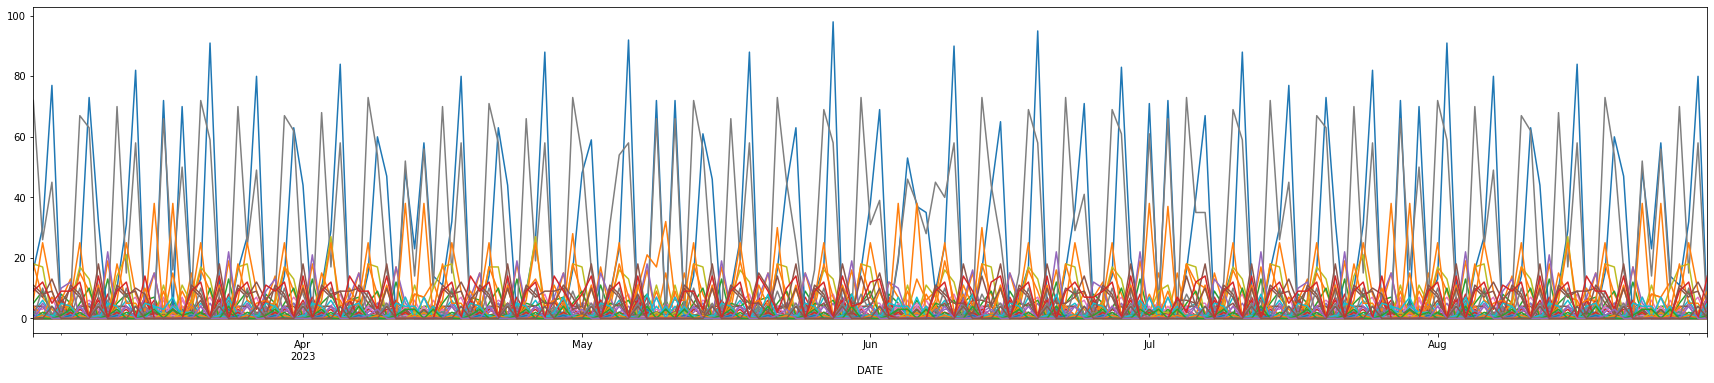

In [276]:
plt.figure(figsize=(5,50))
plt.rcParams["figure.figsize"] = [30, 6]
table.plot(legend = False)
# We Can see that data follows seasonality

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

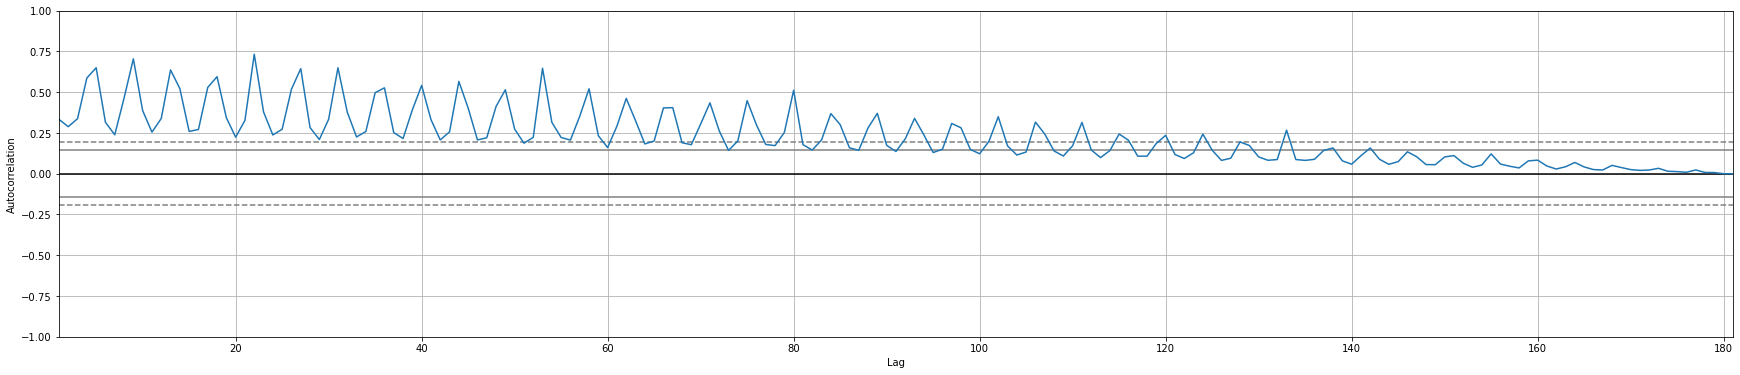

In [277]:
from pandas.plotting import autocorrelation_plot



# Plot the autocorrelation of the data
autocorrelation_plot(table)

In [140]:
print(table.columns)

MultiIndex([('DINNER',           'BACON'),
            ('DINNER',    'BEEF TARTARE'),
            ('DINNER',        'BROCCOLI'),
            ('DINNER',    'CAESAR SALAD'),
            ('DINNER',         'CARROTS'),
            ('DINNER',     'CHARCUTERIE'),
            ('DINNER',   'CHATEAUBRIAND'),
            ('DINNER',           'CHIPS'),
            ('DINNER',     'COCONUT DAL'),
            ('DINNER',       'CRAWNFISH'),
            ('DINNER',          'FILLET'),
            ('DINNER',       'FOIE GRAS'),
            ('DINNER',     'GOAT CHEESE'),
            ('DINNER',     'GREEN BEANS'),
            ('DINNER',  'HADDOCK GRATIN'),
            ('DINNER',         'HALIBUT'),
            ('DINNER',      'LAMBKIDNEY'),
            ('DINNER',        'MACKEREL'),
            ('DINNER',            'MASH'),
            ('DINNER',      'MEDALLIONS'),
            ('DINNER',       'MUSHROOMS'),
            ('DINNER',     'ONION RINGS'),
            ('DINNER',          'ONIONS'),
           

# SPLITTING DATA INTO A TRAIN AND TEST

- When working with time series data, it is important to split the data in a way that preserves the temporal order of the observations. This is because time series data is often characterized by trends and seasonality, and these patterns should be taken into account when building a model.

In [14]:
Train = table[:int(0.85*(len(table)))]
Test = table[int(0.85*(len(table))):]
print(Train.shape,Test.shape)

NameError: name 'table' is not defined

# 1ST MODEL 
- Winter Exponential Smoothing with Additive Seasonality and Additive Trend Model

In [243]:
p = []
for i in table.columns:
    hwe_model_add_add = ExponentialSmoothing(Train[i],seasonal="add",trend="add",seasonal_periods=6).fit()
    pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
    rmse_hwe_add_add = np.sqrt(np.mean((Test[i]-pred_hwe_add_add)**2))
    p.append(round(rmse_hwe_add_add,3))
p = pd.DataFrame(p, columns = ['Winter_Exponential_Smoothing_RMSE'])

# 2ND METHOD MODEL
- HOLT METHOD MODEL

In [244]:
q = []
for j in table.columns:
    hw_model = Holt(Train[j]).fit()
    pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
    rmse_hw = np.sqrt(np.mean((Test[j]-pred_hw)**2))
    q.append(round(rmse_hw,3)) 
p['Holt method Model_RMSE']= pd.DataFrame(q, columns = ['Holt method Model_RMSE'])

# 3rd Model:
- Simple Exponential Mode

In [245]:
r = []
for o in table.columns:
    ses_model = SimpleExpSmoothing(Train[o]).fit()
    pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
    rmse_ses = np.sqrt(np.mean((Test[o]-pred_ses)**2))
    r.append(round(rmse_ses,3)) # 0.49
p['Simple Exponential Mode_RMSE']= pd.DataFrame(r, columns = ['Simple Exponential Mode_RMSE'])

In [279]:

from sklearn.metrics import mean_absolute_error

# Winter Exponential Smoothing with Additive Seasonality and Additive Trend Model
p = []
for i in table.columns:
    hwe_model_add_add = ExponentialSmoothing(Train[i], seasonal="add", trend="add", seasonal_periods=6).fit()
    pred_hwe_add_add = hwe_model_add_add.predict(start=Test.index[0], end=Test.index[-1])
    rmse_hwe_add_add = np.sqrt(np.mean((Test[i] - pred_hwe_add_add)**2))
    r2_hwe_add_add = r2_score(Test[i], pred_hwe_add_add)
    mae_hwe_add_add = mean_absolute_error(Test[i], pred_hwe_add_add)
    p.append([round(rmse_hwe_add_add,3), round(r2_hwe_add_add,3), round(mae_hwe_add_add,3)])

p = pd.DataFrame(p, columns=['Winter_Exponential_Smoothing_RMSE', 'Winter_Exponential_Smoothing_R2', 'Winter_Exponential_Smoothing_MAE'])

# Holt method Model
q = []
for j in table.columns:
    hw_model = Holt(Train[j]).fit()
    pred_hw = hw_model.predict(start=Test.index[0], end=Test.index[-1])
    rmse_hw = np.sqrt(np.mean((Test[j] - pred_hw)**2))
    r2_hw = r2_score(Test[j], pred_hw)
    mae_hw = mean_absolute_error(Test[j], pred_hw)
    q.append([round(rmse_hw,3), round(r2_hw,3), round(mae_hw,3)])
    
p[['Holt_method_Model_RMSE', 'Holt_method_Model_R2', 'Holt_method_Model_MAE']] = pd.DataFrame(q, columns=['Holt_method_Model_RMSE', 'Holt_method_Model_R2', 'Holt_method_Model_MAE'])

# Simple Exponential Mode
r = []
for o in table.columns:
    ses_model = SimpleExpSmoothing(Train[o]).fit()
    pred_ses = ses_model.predict(start=Test.index[0], end=Test.index[-1])
    rmse_ses = np.sqrt(np.mean((Test[o] - pred_ses)**2))
    r2_ses = r2_score(Test[o], pred_ses)
    mae_ses = mean_absolute_error(Test[o], pred_ses)
    r.append([round(rmse_ses,3), round(r2_ses,3), round(mae_ses,3)])
    
p[['Simple_Exponential_Mode_RMSE', 'Simple_Exponential_Mode_R2', 'Simple_Exponential_Mode_MAE']] = pd.DataFrame(r, columns=['Simple_Exponential_Mode_RMSE', 'Simple_Exponential_Mode_R2', 'Simple_Exponential_Mode_MAE'])


In [280]:

p.sum()

Winter_Exponential_Smoothing_RMSE    196.996
Winter_Exponential_Smoothing_R2       -4.567
Winter_Exponential_Smoothing_MAE     169.504
Holt_method_Model_RMSE               191.302
Holt_method_Model_R2                  -0.283
Holt_method_Model_MAE                164.461
Simple_Exponential_Mode_RMSE         191.100
Simple_Exponential_Mode_R2            -0.146
Simple_Exponential_Mode_MAE          163.746
dtype: float64

In [281]:
p.head()

,Winter_Exponential_Smoothing_RMSE,Winter_Exponential_Smoothing_R2,Winter_Exponential_Smoothing_MAE,Holt_method_Model_RMSE,Holt_method_Model_R2,Holt_method_Model_MAE,Simple_Exponential_Mode_RMSE,Simple_Exponential_Mode_R2,Simple_Exponential_Mode_MAE
0,0.802,-0.062,0.713,0.778,-0.000,0.695,0.778,-0.000,0.685
1,0.543,-0.112,0.327,0.517,-0.008,0.313,0.515,-0.001,0.277
2,4.276,-0.036,3.500,4.202,-0.001,3.470,4.203,-0.001,3.457
3,2.554,-0.078,2.134,2.467,-0.006,2.060,2.466,-0.005,2.064
4,1.291,-0.037,1.140,1.267,-0.000,1.117,1.267,-0.000,1.099



Looking at the results, the Winter Exponential Smoothing and Holt method models perform similarly in terms of RMSE, R2, and MAE, while the Simple Exponential Mode model performs slightly worse in all three metrics. However, for some variables, the performance of all models is relatively poor, as indicated by the higher RMSE, lower R2, and higher MAE values. It may be necessary to explore other modeling techniques or adjust the parameters of these models to improve their performance.

# 4) Building Functions
- We are building two different functions first one is to forecast the demand for all items in the menu and the second one is to forecast the demand of the top N item on the menu.

# 1st Function:-
Forecast the demand for all items and normalize the arrangement of Dataframe in Lunch and dinner formate.

Input parameters-

table - Historical Dataframe after modification.

start_date - First date of the period which we want to predict.

end_date - Last date of the period which we want to predict.

In [8]:
def Daily_menu_forcasting(table,start_date,end_date):
    da = pd.date_range(start = start_date, end = end_date , freq='D')
    for_pred = pd.DataFrame(da,columns = ['DATE'] )
    for_pred = for_pred.set_index('DATE')
    for i in table.columns:
        hwe_model_add_add = ExponentialSmoothing(table[i],seasonal="add",trend="add",seasonal_periods=7).fit()
        pred_hwe_add_add = hwe_model_add_add.predict(start = for_pred.index[0],end = for_pred.index[-1])
        for_pred[i]=((round(pred_hwe_add_add)).astype(int))
    final_pred =  for_pred
    p = pd.DataFrame(final_pred.stack())
    p = p.reset_index()
    p[['MENU_ITEM','TIME_OF_DAY']] = p.level_1.str.split("-",expand=True,)
    p = p.rename(columns={0: "QUANTITY"})
    p = p[['DATE','TIME_OF_DAY','MENU_ITEM',"QUANTITY"]]
    p = p[p['QUANTITY']]
    # Makind Dataframe with dinner and lunch columns
    new = p.loc[p.index.repeat(p.ItemQty)]
    f = pd.DataFrame(pd.crosstab([new.DATE,new.MENU_ITEM],[new.QUANTITY]))
    f = f.reset_index()

    # Shorting Data Frame on the basis top item
    f['Total orders of Day'] = f.Dinner + f.Lunch
    f = f.sort_values(['Date', 'Total orders of Day'], ascending=[True, False]).reset_index(drop= True)
    f
    Daily_req_FiNal_Ans = f.copy()
    return Daily_req_FiNal_Ans

In [369]:
table.reset_index(inplace=True)

In [9]:

from statsmodels.tsa.arima.model import ARIMA

def Daily_menu_forcasting(table,start_date,end_date):
    # subset the table based on the start and end dates
    table['DATE'] = pd.to_datetime(table['DATE'])
    table = table[(table['DATE'] >= start_date) & (table['DATE'] <= end_date)]


    # pivot the table to a wide format
    p = pd.pivot_table(table, values='QUANTITY', index=['DATE'], columns=['MENU_ITEM'])
    p.reset_index(inplace=True)

    # split the level_1 column into TIME_OF_DAY and MENU_ITEM
    split_cols = p['MENU_ITEM'].str.split('-', n=1, expand=True)
    print(split_cols.head())  # check the split columns
    p[['TIME_OF_DAY', 'MENU_ITEM']] = split_cols
    print(p.head())  # check the new columns
    p.drop(columns=['MENU_ITEM'], inplace=True)

    # set the DATE column as the index
    p.set_index('DATE', inplace=True)

    # fill in any missing values with 0
    p.fillna(0, inplace=True)

    # create a dataframe to store the forecasted values
    final_pred = pd.DataFrame()

    # loop through each menu item and generate a forecast
    for item in p.columns:
        if item == 'TIME_OF_DAY':
            continue

        # split the data into training and testing sets
        train_data = p[item][:int(0.8*(len(p)))].astype(float)
        test_data = p[item][int(0.8*(len(p))):].astype(float)

        # fit an ARIMA model to the training data
        model = ARIMA(train_data, order=(1,1,1))
        model_fit = model.fit()
        output = model_fit.forecast()

        # generate a forecast for the next 30 days
        yhat = output[0]
        yhat = pd.DataFrame(yhat, columns=[item])
        yhat['DATE'] = pd.date_range(start=p.index[-1], periods=31, freq='D')[1:]
        yhat.set_index('DATE', inplace=True)

        # append the forecast to the final_pred dataframe
        final_pred = pd.concat([final_pred, yhat], axis=1)

    # merge the forecasted values with the original table
        final_pred = final_pred.stack().reset_index()
        final_pred.rename(columns={'level_0':'DATE', 'level_1':'MENU_ITEM', 0:'QUANTITY'}, inplace=True)
        final_pred['TIME_OF_DAY'] = final_pred['MENU_ITEM']

# split the MENU_ITEM column into TIME_OF_DAY and MENU_ITEM
        split_cols = final_pred['MENU_ITEM'].str.split('-', n=1, expand=True)
        final_pred[['TIME_OF_DAY', 'MENU_ITEM']] = split_cols
        final_pred.drop(columns=['MENU_ITEM'], inplace=True)

# set the DATE column as datetime type
        final_pred['DATE'] = pd.to_datetime(final_pred['DATE'])

# sort the values by date and time of day
        final_pred.sort_values(by=['DATE', 'TIME_OF_DAY'], inplace=True)

# reset the index
        final_pred.reset_index(drop=True, inplace=True)
    
        return final_pred


# 2nd Function:
Forecast the demand for top N items and normalize the arrangement of Dataframe in Lunch and dinner formate.

Input parameters-

table - Historical Dataframe after modification.

start_date - First date of the period which we want to predict.

end_date - Last date of the period which we want to predict.

N - Number of the top items we want. (default n=5)

In [11]:
def Daily_top_menu_forcasting(table,start_date,end_date,N=5):
    da = pd.date_range(start = start_date, end = end_date , freq='D')
    for_pred = pd.DataFrame(da,columns = ['DATE'] )
    for_pred = for_pred.set_index('DATE')
    for i in table.columns:
        hwe_model_add_add = ExponentialSmoothing(table[i],seasonal="add",trend="add",seasonal_periods=7).fit()
        pred_hwe_add_add = hwe_model_add_add.predict(start = for_pred.index[0],end = for_pred.index[-1])
        for_pred[i]=((round(pred_hwe_add_add)).astype(int))
    final_pred =  for_pred
    p = pd.DataFrame(final_pred.stack())
    p = p.reset_index()
  # split level_1 column into two columns
    p[['TIME_OF_DAY', 'MENU_ITEM']] = p['level_1'].str.split('-', n=1, expand=True)

# drop the original level_1 column
    p.drop('level_1', axis=1, inplace=True)
    p = p[['DATE', 'TIME_OF_DAY', 'MENU_ITEM', 0]].rename(columns={0: 'QUANTITY'})
    # Makind Dataframe with dinner and lunch columns
    new = p.loc[p.index.repeat(p.QUANTITY)]
    f = pd.DataFrame(pd.crosstab([new.DATE,new.MENU_ITEM],[new.TIME_OF_DAY]))
    f = f.reset_index()

    # Shorting Data Frame on the basis top item
    f['Total orders of Day'] = f.DINNER + f.LUNCH
    f = f.sort_values(['DATE', 'Total orders of Day'], ascending=[True, False]).reset_index(drop= True)
    f
    # Finding Topr product for days.
    name =((f['DATE'].astype(str)).unique()).tolist()
    t = pd.DataFrame(columns = f.columns)
    for i in name:
        v = pd.DataFrame((f[f['DATE']==i]).head(N))
        t = pd.concat([t,v],axis = 0)
    Daily_top_FiNal_Ans = t.reset_index(drop = True)
    return(Daily_top_FiNal_Ans)

# For total items


In [12]:
result = Daily_menu_forcasting(table, '2022-01-01', '2022-01-31')
print(result)

NameError: name 'table' is not defined

# For top N items

In [13]:
# Here N = 8
top_8_menu = Daily_top_menu_forcasting(table,'7/4/2023','7/5/2023',8)
top_8_menu.head(10)

NameError: name 'table' is not defined

# Conclusion